In [76]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [77]:
x = np.loadtxt('ex2x.dat')
y = np.loadtxt('ex2y.dat')

In [78]:
# plt.plot(x, y, 'o')
# plt.ylabel('Prices')
# plt.xlabel('Living area and # of bedrooms')
# plt.show()
print(x, y)

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]
 [1.940e+03 4.000e+00]
 [2.000e+03 3.000e+00]
 [1.890e+03 3.000e+00]
 [4.478e+03 5.000e+00]
 [1.268e+03 3.000e+00]
 [2.300e+03 4.000e+00]
 [1.320e+03 2.000e+00]
 [1.236e+03 3.000e+00]
 [2.609e+03 4.000e+00]
 [3.031e+03 4.000e+00]
 [1.767e+03 3.000e+00]
 [1.888e+03 2.000e+00]
 [1.604e+03 3.000e+00]
 [1.962e+03 4.000e+00]
 [3.890e+03 3.000e+00]
 [1.100e+03 3.000e+00]
 [1.458e+03 3.000e+00]
 [2.526e+03 3.000e+00]
 [2.200e+03 3.000e+00]
 [2.637e+03 3.000e+00]
 [1.839e+03 2.000e+00]
 [1.000e+03 1.000e+00]
 [2.040e+03 4.000e+00]
 [3.137e+03 3.000e+00]
 [1.811e+03 4.000e+00]
 [1.437e+03 3.000e+00]
 [1.239e+03 3.000e+00]
 [2.132e+03 4.000e+00]
 [4.215e+03 4.000e+00]
 [2.162e+03 4.000e+00]
 [1.664e+03 2.000e+00]
 [2.238e+03 3.000e+00]
 [2.567e+03 4.000e+00]
 [1.200e+03

In [79]:
m = len(y)
x = np.c_[np.ones(m), x]

In [80]:
sigma = np.std(x[:, 1:], axis=0)
mu = np.mean(x[:, 1:], axis=0)
x[:, 1:] = (x[:, 1:] - mu) / sigma

In [81]:
n = x.shape[1]
theta = np.zeros(n)

alpha = 0.07

class Optimizer:
    def __init__(self, x: np.ndarray, y: np.ndarray, theta: np.ndarray, alpha: float):
        self.x = x
        self.y = y
        self.theta = theta
        self.alpha = alpha

    def forward(self):
        return np.dot(self.x, self.theta)

    def gradient(self):
        h = self.forward()
        return np.array([np.sum((h - y) * x[:, i]) / m for i in range(n)])

    def step(self):
        self.theta -= self.alpha * self.gradient()

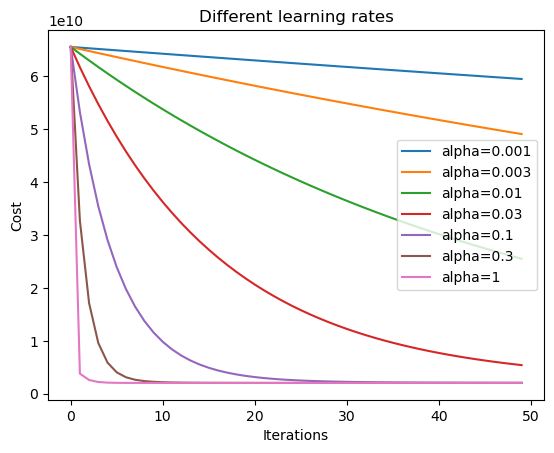

In [82]:
alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]

for alpha in alphas:
    x_ = x.copy()
    y_ = y.copy()
    theta_ = theta.copy()
    optimizer = Optimizer(x_, y_, theta_, alpha)

    iterations = 50
    J = np.zeros(iterations)

    for i in range(iterations):
        J[i] = np.sum((optimizer.forward() - y) ** 2) / (2 * m)
        optimizer.step()

    plt.plot(J)
plt.legend([f'alpha={alpha}' for alpha in alphas])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Different learning rates')
plt.show()

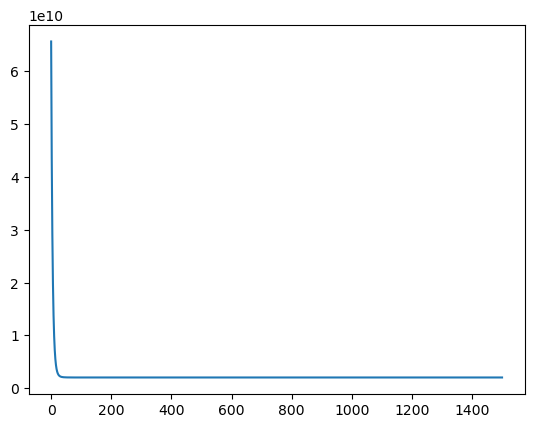

In [83]:
alpha = 0.1
x_ = x.copy()
y_ = y.copy()
theta_ = theta.copy()
optimizer = Optimizer(x_, y_, theta_, alpha)

iterations = 1500
J = np.zeros(iterations)

for i in range(iterations):
    J[i] = np.sum((optimizer.forward() - y) ** 2) / (2 * m)
    optimizer.step()

plt.plot(J)

In [86]:
theta_

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [87]:
predict_x = np.array([[1650, 3]])
predict_x = (predict_x - mu) / sigma
predict_x = np.c_[np.ones(1), predict_x]
predict_y = np.dot(predict_x, theta_)
print(predict_y)

[293081.4643349]


In [88]:
x = np.loadtxt('ex2x.dat')
y = np.loadtxt('ex2y.dat')
x = np.c_[np.ones(m), x]
theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
print(theta)

[89597.9095428    139.21067402 -8738.01911233]


In [91]:
predict_x = np.array([[1650, 3]])
predict_x = np.c_[np.ones(1), predict_x]
predict_y = np.dot(predict_x, theta)
print(predict_y)

[293081.46433489]
